# Excercising Machine Learning in CHOP Machine Learning Workshop
### Contributors: Grace Pham, Zoë Wilkinson Saldaña

In [1]:
import os
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

#import packages and libraries
#setting up initialization

In [6]:
from sklearn.datasets import load_wine
wine = load_wine()
wine
#load data into linked list
#assign to variable "wine"

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [7]:
print(wine.DESCR)
#printing dataset description

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [10]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()
#load the dataset into data frame "df", set columns' names

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
df = df.drop(columns=['ash', 'alcalinity_of_ash','flavanoids','nonflavanoid_phenols','proanthocyanins','proline'])
df
#drop feature columns

,alcohol,malic_acid,magnesium,total_phenols,color_intensity,hue,od280/od315_of_diluted_wines
0,14.23,1.71,127.0,2.80,5.64,1.04,3.92
1,13.20,1.78,100.0,2.65,4.38,1.05,3.40
2,13.16,2.36,101.0,2.80,5.68,1.03,3.17
3,14.37,1.95,113.0,3.85,7.80,0.86,3.45
4,13.24,2.59,118.0,2.80,4.32,1.04,2.93
...,...,...,...,...,...,...,...
173,13.71,5.65,95.0,1.68,7.70,0.64,1.74
174,13.40,3.91,102.0,1.80,7.30,0.70,1.56
175,13.27,4.28,120.0,1.59,10.20,0.59,1.56
176,13.17,2.59,120.0,1.65,9.30,0.60,1.62


In [12]:
df.columns
#return columns' names

Index(['alcohol', 'malic_acid', 'magnesium', 'total_phenols',
       'color_intensity', 'hue', 'od280/od315_of_diluted_wines'],
      dtype='object')

In [13]:
df.columns = ['alcohol', 'malic_acid', 'magnesium', 'total_phenols',
       'color_intensity', 'hue', 'diluted']
#rename columns in dataframe

In [14]:
df['class_name'] = pd.Categorical.from_codes(wine.target, wine.target_names)
#create a new column showing class type of wine

df.head()
#return first 5 rows

,alcohol,malic_acid,magnesium,total_phenols,color_intensity,hue,diluted,class_name
0,14.23,1.71,127.0,2.80,5.64,1.04,3.92,class_0
1,13.20,1.78,100.0,2.65,4.38,1.05,3.40,class_0
2,13.16,2.36,101.0,2.80,5.68,1.03,3.17,class_0
3,14.37,1.95,113.0,3.85,7.80,0.86,3.45,class_0
4,13.24,2.59,118.0,2.80,4.32,1.04,2.93,class_0


In [15]:
df0 = df.drop(columns=['class_name'])
df0
#create dataframe df1 containing only chosen feature names (without target names)

,alcohol,malic_acid,magnesium,total_phenols,color_intensity,hue,diluted
0,14.23,1.71,127.0,2.80,5.64,1.04,3.92
1,13.20,1.78,100.0,2.65,4.38,1.05,3.40
2,13.16,2.36,101.0,2.80,5.68,1.03,3.17
3,14.37,1.95,113.0,3.85,7.80,0.86,3.45
4,13.24,2.59,118.0,2.80,4.32,1.04,2.93
...,...,...,...,...,...,...,...
173,13.71,5.65,95.0,1.68,7.70,0.64,1.74
174,13.40,3.91,102.0,1.80,7.30,0.70,1.56
175,13.27,4.28,120.0,1.59,10.20,0.59,1.56
176,13.17,2.59,120.0,1.65,9.30,0.60,1.62


In [16]:
df.info()
#return summary of dataframe "df"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   alcohol          178 non-null    float64 
 1   malic_acid       178 non-null    float64 
 2   magnesium        178 non-null    float64 
 3   total_phenols    178 non-null    float64 
 4   color_intensity  178 non-null    float64 
 5   hue              178 non-null    float64 
 6   diluted          178 non-null    float64 
 7   class_name       178 non-null    category
dtypes: category(1), float64(7)
memory usage: 10.1 KB


In [48]:
df0.info()
#return summary of dataframe "df0"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   alcohol          178 non-null    float64
 1   malic_acid       178 non-null    float64
 2   magnesium        178 non-null    float64
 3   total_phenols    178 non-null    float64
 4   color_intensity  178 non-null    float64
 5   hue              178 non-null    float64
 6   diluted          178 non-null    float64
dtypes: float64(7)
memory usage: 9.9 KB


In [17]:
n_samples, n_features = df0.shape   #assigning samples and feature
print((n_samples, n_features))

(178, 7)


In [54]:
print(wine.target)
#print target array

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [20]:
print(wine.target_names)
##print target names array

['class_0' 'class_1' 'class_2']


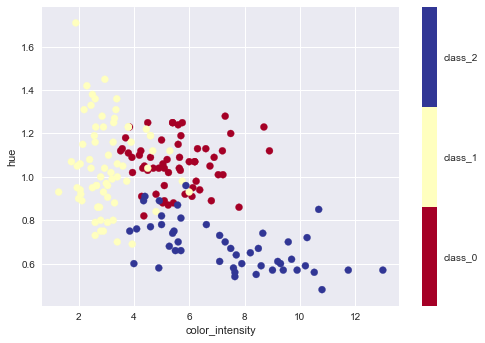

In [29]:
#showing the correlation between the hue value and the color intensity value of wine with its class name

x_index = 4
y_index = 5
#set index of feature column in dataframe df0

formatter = plt.FuncFormatter(lambda i, *args: wine.target_names[int(i)])

plt.scatter(df0.values[:, x_index], df.values[:, y_index],
            c=wine.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(df0.columns.values[x_index])
plt.ylabel(df0.columns.values[y_index]);

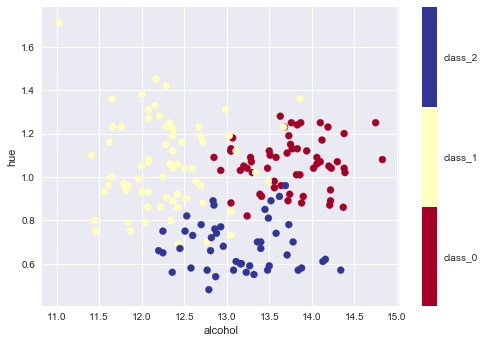

In [33]:
#showing the correlation between the alcohol content value and the hue value of wine with its class name

x_index = 0
y_index = 5
#set index of feature column in dataframe df0

formatter = plt.FuncFormatter(lambda i, *args: wine.target_names[int(i)])

plt.scatter(df0.values[:, x_index], df.values[:, y_index],
            c=wine.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(df0.columns.values[x_index])
plt.ylabel(df0.columns.values[y_index]);

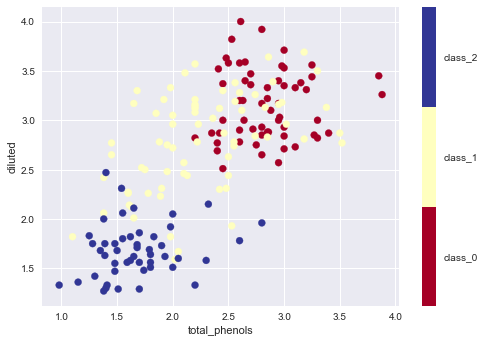

In [50]:
#showing the correlation between the OD280/OD315 of diluted wines value and the total phenol value of wine with its class names

x_index = 3
y_index = 6
#set index of feature column in dataframe df0

formatter = plt.FuncFormatter(lambda i, *args: wine.target_names[int(i)])

plt.scatter(df0.values[:, x_index], df.values[:, y_index],
            c=wine.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(df0.columns.values[x_index])
plt.ylabel(df0.columns.values[y_index]);

### Work Cited

This notebook is a personal practice which are primarily based on [Zoë Wilkinson Saldaña's Introduction & Classification with Scikit-learn](intro-to-ml/ml_workbook_00_intro.ipynb) in CHOP Machine Learning Workshop